## 영상정보처리 5주차 과제 템플리트
- 점수: 10점 만점
- 이미지 경로 잘못 사용한 경우: -3
- 문제1: 10점 

이름: 이상민            
학번: 32153180


# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [11]:
%cd /gdrive/My\ Drive/ImageProcClass/Week6
%ls 

/gdrive/My Drive/ImageProcClass/Week6
2020-2-ImgProc-HW6-이상민-32153180.ipynb  2020-2-ImgProc-HW6-Template.ipynb


In [12]:
!pwd
%ls ../

/gdrive/My Drive/ImageProcClass/Week6
Dongkeun-OpenCV-ImgData/  Week1/  Week2/  Week3/  Week4/  Week5/  Week6/


다음의 경로는 변경하지 말것

In [13]:
image_path = '../Dongkeun-OpenCV-ImgData/lena.jpg' 

##문제 1:


1.   주어진 영상을 ~gray~ color image로 읽어 들인다 (org_img)
2.   입력 영상과 같은 크기의 빈 컬러 이미지를 만든다 (new_image)
3. 공백 이미지(new_image) 를 2 x 2 로 분할하여 4개의 서브이미지 영역을 구분한다.
4. 오른쪽 위를 1 영역이라고 하고, 시계 방향으로 2, 3, 4 영역이라고 한다. 
5. 1영역은 blue channel 값만을 가지고, 2영역은 green channel, 3영역은 red channel 값만 가지고, 4 영역은 3개의 channel 이 merging 된 영상을 집어 넣는다.
6. new_image 를 출력한다. 





original image shape : (512, 512, 3)


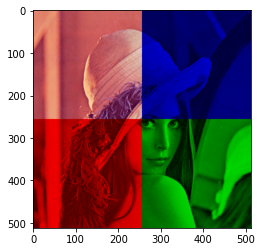

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

org_img = cv2.imread(image_path)
# change BGR to RGB
org_img = org_img[:, :, ::-1]
print('original image shape :', org_img.shape)
new_image = np.zeros(org_img.shape, dtype=np.uint8)

split_img = cv2.split(org_img)

blue_img = np.zeros(org_img.shape, dtype=np.uint8)
green_img = np.zeros(org_img.shape, dtype=np.uint8)
red_img = np.zeros(org_img.shape, dtype=np.uint8)

blue_img[:, :, 2] = split_img[2]
green_img[:, :, 1] = split_img[1]
red_img[:, :, 0] = split_img[0]

new_image[:256, 256:, 2] = blue_img[:256, 256:, 2]
new_image[256:, 256:, 1] = green_img[256:, 256:, 1]
new_image[256:, :256, 0] = red_img[256:, :256, 0]
new_image[:256, :256] = cv2.merge([red_img[:256, :256, 0], green_img[:256, :256, 1], blue_img[:256, :256, 2]])

plt.imshow(new_image)
plt.show()

### 굳이 split, merge 과정 없이도 수행 가능

original image shape : (512, 512, 3)


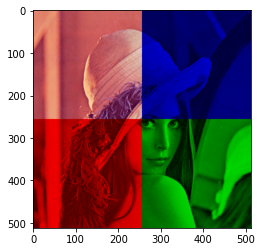

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

org_img = cv2.imread(image_path)
# change BGR to RGB
org_img = org_img[:, :, ::-1]
print('original image shape :', org_img.shape)
new_image = np.zeros(org_img.shape, dtype=np.uint8)

new_image[:256, 256:, 2] = org_img[:256, 256:, 2]
new_image[256:, 256:, 1] = org_img[256:, 256:, 1]
new_image[256:, :256, 0] = org_img[256:, :256, 0]
new_image[:256, :256] = org_img[:256, :256]

plt.imshow(new_image)
plt.show()